In [1]:
# 多个神经元 - 多分类
# 单层神经元的缺陷：无法拟合“异或”运算 异或问题看似简单，使用单层的神经元确实没有办法解决
# 神经元要求数据必须是线性可分的
# 异或 问题无法找到一条直线分割两个类
# 这个问题使得神经网络的发展停滞了很多年

In [2]:
# 多层感知器的简单解释

# 激活函数 
# relu：屏蔽小于0的信号
# sigmoid：输出范围在（0,1）之间
# tanh：（-1,1）
# leak relu：负数传递出一个很小的值

In [3]:
import tensorflow as tf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_csv('./dataset/data.csv')

In [33]:
#data.head()
data

,City,Tolerance,Amenity,PolicyAttention,CreativeClass,HumanCapital,Patents,HighTech,GDP
0,Beijing,0.3513,1.2016,101,7.1850,0.476,0.0854,0.256,0.0502
1,Tianjin,0.2906,1.0628,87,1.9755,0.311,0.0366,0.154,0.0276
2,Shijiazh,0.0463,1.0898,83,1.1768,0.249,0.0047,0.102,0.0162
3,Taiyuan,0.1394,0.9420,65,2.4314,0.305,0.0156,0.114,0.0277
4,Hohhot,0.2062,1.0713,52,2.1060,0.283,0.0024,0.172,0.0273
5,Shenyang,0.0916,1.1274,73,1.4937,0.310,0.0153,0.093,0.0238
6,Changchu,0.2074,1.1270,27,1.5421,0.253,0.0013,0.108,0.0240
7,Harbin,0.1164,1.1042,51,1.1886,0.228,0.0104,0.140,0.0169
8,Shanghai,0.3950,1.1502,185,3.9952,0.376,0.0542,0.226,0.0481
9,Nanjing,0.0333,0.9684,93,2.8209,0.304,0.0613,0.255,0.0507


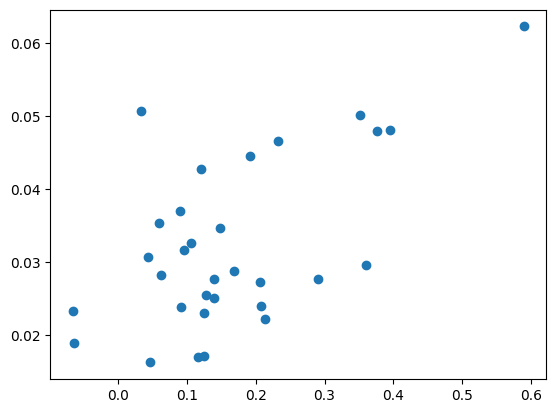

In [35]:
plt.scatter(data.Tolerance,data.GDP)

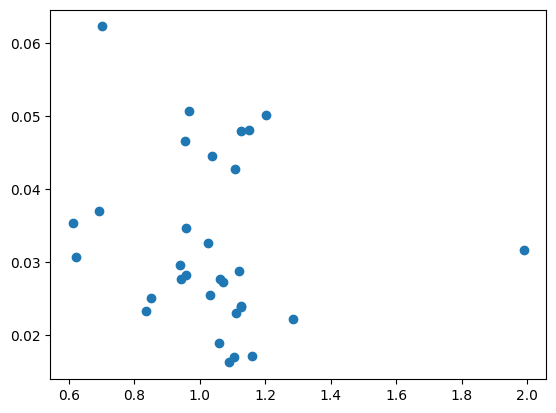

In [36]:
plt.scatter(data.Amenity,data.GDP)

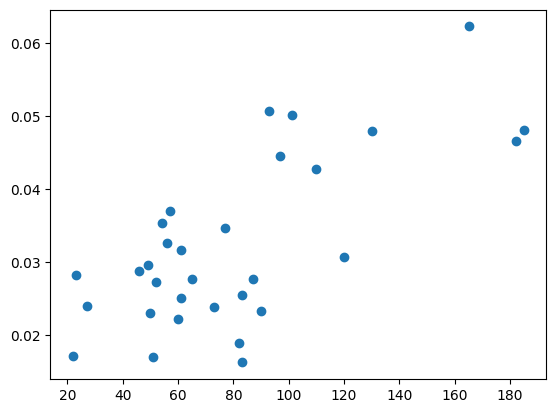

In [37]:
plt.scatter(data.PolicyAttention,data.GDP)

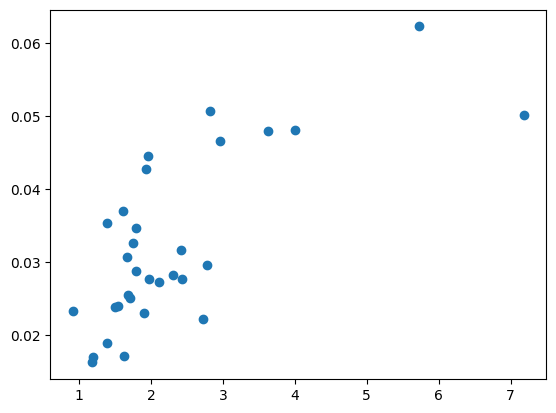

In [38]:
plt.scatter(data.CreativeClass,data.GDP)

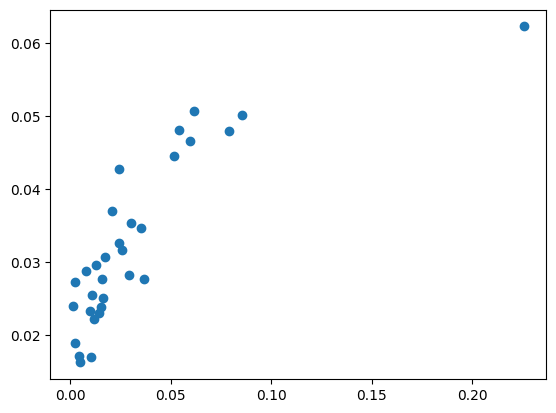

In [39]:
plt.scatter(data.Patents,data.GDP)

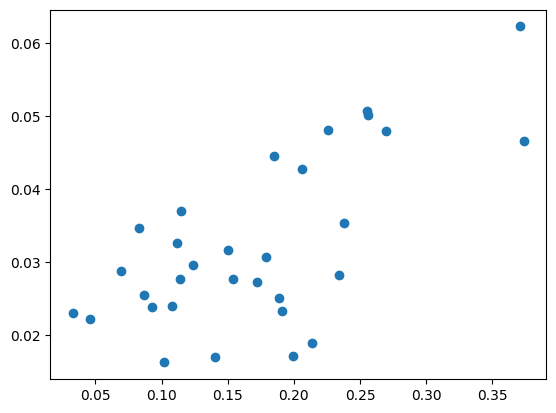

In [40]:
plt.scatter(data.HighTech,data.GDP)

In [41]:
# 7列特征
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [42]:
# 顺序模型 7+1
model = tf.keras.Sequential([tf.keras.layers.Dense(8,input_shape = (7,),activation = 'relu'),
                             tf.keras.layers.Dense(1)]
                             )

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',
             loss='mse'
             )

In [45]:
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 341ms/step - loss: 3.5691
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.3992
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.2343
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 3.0745
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.9198
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.7702
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.6256
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.4861
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.3517
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.2224
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.0980
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.9786
Epoch 13/2000
1/1 [============================

1/1 [==============================] - 0s 6ms/step - loss: 0.0313
Epoch 104/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0310
Epoch 105/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0307
Epoch 106/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0304
Epoch 107/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0301
Epoch 108/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0299
Epoch 109/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0296
Epoch 110/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0293
Epoch 111/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0291
Epoch 112/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0288
Epoch 113/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0286
Epoch 114/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0284
Epoch 115/2000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0174
Epoch 205/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0174
Epoch 206/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0173
Epoch 207/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0172
Epoch 208/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 209/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0170
Epoch 210/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0169
Epoch 211/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 212/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 213/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0167
Epoch 214/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0166
Epoch 215/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0165
Epoch 216/2000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0099
Epoch 306/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 307/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 308/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 309/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0097
Epoch 310/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0096
Epoch 311/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 312/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 313/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 314/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 315/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 316/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 317/2000
1/1 [=======================

1/1 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 407/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 408/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 409/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 410/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 411/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 412/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 413/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 414/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 415/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 416/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 417/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 418/2000
1/1 [=======================

1/1 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 508/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 509/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 510/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 511/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 512/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 513/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 514/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 515/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 516/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 517/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 518/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 519/2000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 609/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 610/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 611/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 612/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 613/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 614/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 615/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 616/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 617/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 618/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 619/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 620/2000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 9.5449e-04
Epoch 709/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.4994e-04
Epoch 710/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.4541e-04
Epoch 711/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.4093e-04
Epoch 712/2000
1/1 [==============================] - 0s 8ms/step - loss: 9.3647e-04
Epoch 713/2000
1/1 [==============================] - 0s 8ms/step - loss: 9.3206e-04
Epoch 714/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.2767e-04
Epoch 715/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.2332e-04
Epoch 716/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.1901e-04
Epoch 717/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.1472e-04
Epoch 718/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.1047e-04
Epoch 719/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.0626

1/1 [==============================] - 0s 8ms/step - loss: 6.4701e-04
Epoch 805/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.4490e-04
Epoch 806/2000
1/1 [==============================] - 0s 9ms/step - loss: 6.4282e-04
Epoch 807/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.4074e-04
Epoch 808/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.3869e-04
Epoch 809/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.3665e-04
Epoch 810/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.3463e-04
Epoch 811/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.3263e-04
Epoch 812/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.3064e-04
Epoch 813/2000
1/1 [==============================] - 0s 8ms/step - loss: 6.2867e-04
Epoch 814/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.2671e-04
Epoch 815/2000
1/1 [==============================] - 0s 6ms/step - loss: 6.2478

1/1 [==============================] - 0s 7ms/step - loss: 5.0799e-04
Epoch 901/2000
1/1 [==============================] - 0s 8ms/step - loss: 5.0706e-04
Epoch 902/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.0614e-04
Epoch 903/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.0523e-04
Epoch 904/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.0433e-04
Epoch 905/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.0344e-04
Epoch 906/2000
1/1 [==============================] - 0s 8ms/step - loss: 5.0255e-04
Epoch 907/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.0167e-04
Epoch 908/2000
1/1 [==============================] - 0s 8ms/step - loss: 5.0080e-04
Epoch 909/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.9993e-04
Epoch 910/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.9908e-04
Epoch 911/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.9823

1/1 [==============================] - 0s 6ms/step - loss: 4.4764e-04
Epoch 997/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.4724e-04
Epoch 998/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.4684e-04
Epoch 999/2000
1/1 [==============================] - 0s 8ms/step - loss: 4.4645e-04
Epoch 1000/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.4606e-04
Epoch 1001/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.4568e-04
Epoch 1002/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.4529e-04
Epoch 1003/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.4492e-04
Epoch 1004/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.4454e-04
Epoch 1005/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.4417e-04
Epoch 1006/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.4380e-04
Epoch 1007/2000
1/1 [==============================] - 0s 7ms/step - loss

1/1 [==============================] - 0s 7ms/step - loss: 4.2144e-04
Epoch 1092/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.2125e-04
Epoch 1093/2000
1/1 [==============================] - 0s 8ms/step - loss: 4.2107e-04
Epoch 1094/2000
1/1 [==============================] - 0s 8ms/step - loss: 4.2089e-04
Epoch 1095/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.2071e-04
Epoch 1096/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.2053e-04
Epoch 1097/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.2036e-04
Epoch 1098/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.2018e-04
Epoch 1099/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.2001e-04
Epoch 1100/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.1983e-04
Epoch 1101/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.1966e-04
Epoch 1102/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 7ms/step - loss: 4.0846e-04
Epoch 1187/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0835e-04
Epoch 1188/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.0825e-04
Epoch 1189/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0815e-04
Epoch 1190/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0805e-04
Epoch 1191/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0795e-04
Epoch 1192/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.0785e-04
Epoch 1193/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0775e-04
Epoch 1194/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.0765e-04
Epoch 1195/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.0755e-04
Epoch 1196/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0745e-04
Epoch 1197/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 7ms/step - loss: 4.0018e-04
Epoch 1282/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0011e-04
Epoch 1283/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.0003e-04
Epoch 1284/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9995e-04
Epoch 1285/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9988e-04
Epoch 1286/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9980e-04
Epoch 1287/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9973e-04
Epoch 1288/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9965e-04
Epoch 1289/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.9957e-04
Epoch 1290/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.9950e-04
Epoch 1291/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.9942e-04
Epoch 1292/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 8ms/step - loss: 3.6773e-04
Epoch 1377/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.6733e-04
Epoch 1378/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.6693e-04
Epoch 1379/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.6653e-04
Epoch 1380/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.6612e-04
Epoch 1381/2000
1/1 [==============================] - 0s 8ms/step - loss: 3.6572e-04
Epoch 1382/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.6532e-04
Epoch 1383/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.6492e-04
Epoch 1384/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.6452e-04
Epoch 1385/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.6412e-04
Epoch 1386/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.6372e-04
Epoch 1387/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 7ms/step - loss: 3.3131e-04
Epoch 1472/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.3095e-04
Epoch 1473/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.3058e-04
Epoch 1474/2000
1/1 [==============================] - 0s 7ms/step - loss: 3.3022e-04
Epoch 1475/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2986e-04
Epoch 1476/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2950e-04
Epoch 1477/2000
1/1 [==============================] - 0s 5ms/step - loss: 3.2914e-04
Epoch 1478/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2878e-04
Epoch 1479/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2842e-04
Epoch 1480/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2806e-04
Epoch 1481/2000
1/1 [==============================] - 0s 6ms/step - loss: 3.2770e-04
Epoch 1482/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 7ms/step - loss: 2.9873e-04
Epoch 1567/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9841e-04
Epoch 1568/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9809e-04
Epoch 1569/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9777e-04
Epoch 1570/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.9745e-04
Epoch 1571/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9712e-04
Epoch 1572/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9680e-04
Epoch 1573/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.9648e-04
Epoch 1574/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9616e-04
Epoch 1575/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9585e-04
Epoch 1576/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.9553e-04
Epoch 1577/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 2.6994e-04
Epoch 1662/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.6965e-04
Epoch 1663/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6937e-04
Epoch 1664/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.6909e-04
Epoch 1665/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6881e-04
Epoch 1666/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.6852e-04
Epoch 1667/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6824e-04
Epoch 1668/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6796e-04
Epoch 1669/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6768e-04
Epoch 1670/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6740e-04
Epoch 1671/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.6712e-04
Epoch 1672/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 2.4479e-04
Epoch 1757/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4455e-04
Epoch 1758/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4430e-04
Epoch 1759/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4406e-04
Epoch 1760/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.4381e-04
Epoch 1761/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.4357e-04
Epoch 1762/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4332e-04
Epoch 1763/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4308e-04
Epoch 1764/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.4284e-04
Epoch 1765/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4259e-04
Epoch 1766/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.4235e-04
Epoch 1767/2000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 2.2311e-04
Epoch 1852/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.2290e-04
Epoch 1853/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.2269e-04
Epoch 1854/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.2248e-04
Epoch 1855/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.2227e-04
Epoch 1856/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.2206e-04
Epoch 1857/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.2185e-04
Epoch 1858/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.2164e-04
Epoch 1859/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.2143e-04
Epoch 1860/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.2123e-04
Epoch 1861/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.2102e-04
Epoch 1862/2000
1/1 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 2.0465e-04
Epoch 1947/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.0447e-04
Epoch 1948/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0430e-04
Epoch 1949/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0412e-04
Epoch 1950/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.0394e-04
Epoch 1951/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.0377e-04
Epoch 1952/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0359e-04
Epoch 1953/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.0341e-04
Epoch 1954/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0324e-04
Epoch 1955/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.0306e-04
Epoch 1956/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.0289e-04
Epoch 1957/2000
1/1 [==============================] - 0s 6ms/step - l

In [52]:
test =  data.iloc[:30,1:-1]

In [53]:
model.predict(test)

1/1 [==============================] - 0s 13ms/step


array([[0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ],
       [0.07191454],
       [0.0307469 ],
       [0.0307469 ],
       [0.0307469 ]], dtype=float32)

In [54]:
test = data.iloc[:30,-1]

In [55]:
test

0     0.0502
1     0.0276
2     0.0162
3     0.0277
4     0.0273
5     0.0238
6     0.0240
7     0.0169
8     0.0481
9     0.0507
10    0.0466
11    0.0354
12    0.0370
13    0.0307
14    0.0326
15    0.0346
16    0.0445
17    0.0428
18    0.0479
19    0.0623
20    0.0189
21    0.0221
22    0.0232
23    0.0316
24    0.0251
25    0.0287
26    0.0282
27    0.0230
28    0.0171
29    0.0255
Name: GDP, dtype: float64